In [24]:
import json

with open('../../data/lyrics.json', 'r', encoding='utf8') as f:
    dataset = json.load(f)

In [111]:
# Histograms for sentiment and toxicity

sentiment_histogram = []
toxicity_histogram = []

for song in dataset:
    if song['sentiment_value'] is not None:
        sentiment_histogram.append(song['sentiment_value'])
    if song['toxicity_value'] is not None:
        toxicity_histogram.append(song['toxicity_value'])


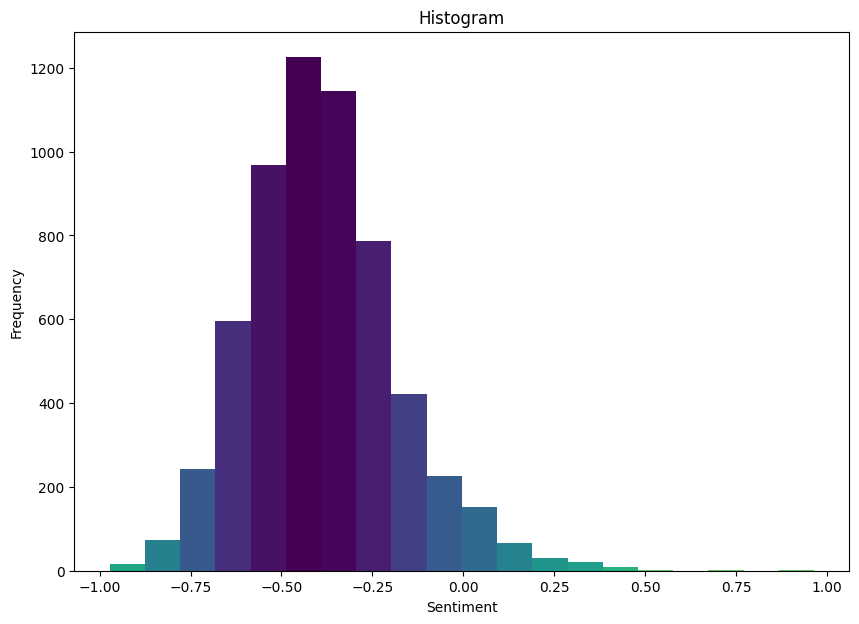

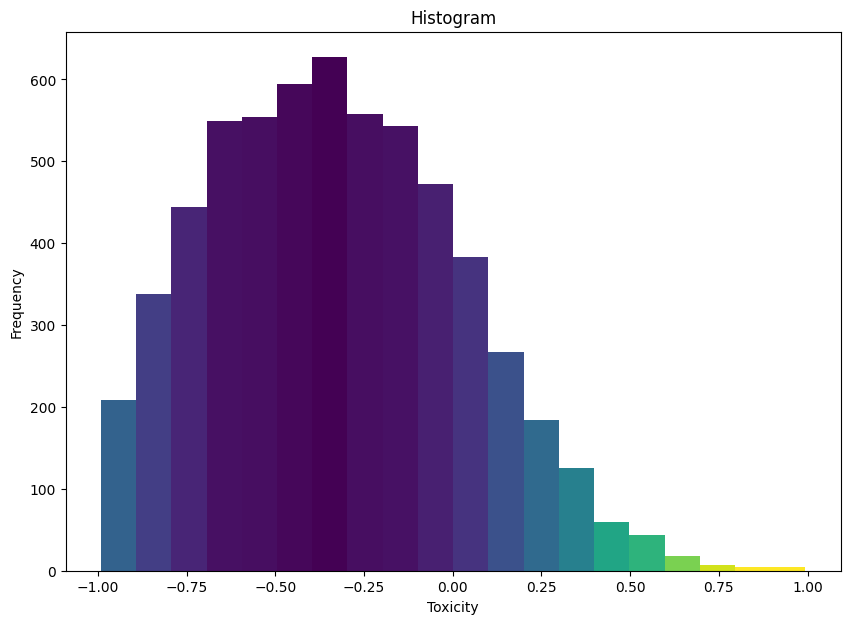

In [61]:

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

def histogram_plot(data, filename, label):



    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))

    # Creating histogram
    N, bins, patches = ax.hist(data, bins = 20)

    # Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(1-norm(thisfrac))
        thispatch.set_facecolor(color)

    # Adding extra features
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.title('Histogram')

    # Show plot
    # plt.show()
    plt.savefig(filename + '.png')

histogram_plot(np.array(sentiment_histogram), '../../data/sentiment_histogram', 'Sentiment')
histogram_plot(np.array(toxicity_histogram), '../../data/toxicity_histogram', 'Toxicity')


In [62]:
def print_values(values, name):
    # mean
    mean = np.mean(values)
    # median
    median = np.median(values)
    # 0.25 quantile
    q_25 = np.quantile(values, 0.25)
    # 0.75 quantile
    q_75 = np.quantile(values, 0.75)
    # standard deviation
    std = np.std(values)

    print(f"Statistical Metrics for {name}: Mean = {mean}, Median = {median}, 25%-Quantile = {q_25}, 75%-Quantile = {q_75}, Standard deviation = {std}")

print_values(sentiment_histogram, 'Sentiment')
print_values(toxicity_histogram, 'Toxicity')

Statistical Metrics for Sentiment: Mean = -0.3865343225905885, Median = -0.4013998887755654, 25%-Quantile = -0.5230865979736501, 75%-Quantile = -0.27162173403693096, Standard deviation = 0.2037442931718223
Statistical Metrics for Toxicity: Mean = -0.3282731761483918, Median = -0.34842554444358464, 25%-Quantile = -0.6000256461627556, 75%-Quantile = -0.08263202186288504, Standard deviation = 0.348997016657076


In [63]:
from Pipeline.Analysis.CheckOccurences import categories
import pandas as pd


def sum_occurences_over_time():
    columns = [str(i) for i in range(1998, 2024)]
    index = list(categories.categories.keys()) + ['number_of_songs']
    results_occurrences = pd.DataFrame(0,
                           index=index,
                           columns=columns)

    results_sentiment = {year: [] for year in columns}
    results_toxicity = {year: [] for year in columns}


    for song_temp in dataset:
        if song_temp['release_date'] not in [None, "unidentified"]:
            year = song_temp['release_date'][0:4]
            if year in columns:
                if song_temp['sentiment_value'] is not None:
                    results_sentiment[year].append(song_temp['sentiment_value'])
                if song_temp['toxicity_value'] is not None:
                    results_toxicity[year].append(song_temp['toxicity_value'])


                results_occurrences.at['number_of_songs', year] += 1
            for category, matched_word_dict in song_temp['matched_categories'].items():
                if year in columns:
                    results_occurrences.at[category, year] = results_occurrences.at[category, year] + \
                                                 sum([count for word, count in matched_word_dict.items()])

    for year in columns:
        for category, _ in categories.categories.items():
            if results_occurrences.at['number_of_songs', year] != 0:
                results_occurrences.at[category, year] = \
                    round(float(results_occurrences.at[category, year]) / float(results_occurrences.at['number_of_songs', year]), 2)
            else:
                results_occurrences.at[category, year] = 0

    return results_occurrences, results_sentiment, results_toxicity


results_occurences, results_sentiment, results_toxicity = sum_occurences_over_time()

                           1998   1999   2000   2001   2002   2003   2004  \
Antisemitismus             0.00   0.05   0.02   0.08   0.09   0.00   0.04   
Behindertenfeindlichkeit   0.10   0.05   0.33   0.08   0.52   0.11   0.18   
Frauenfeindlichkeit        0.81   0.86   3.11   3.38   2.57   8.11   2.07   
Gewalt                     0.86   1.19   1.67   2.04   1.65   2.63   1.86   
Homophobie                 0.05   0.10   0.56   0.73   0.17   0.37   0.25   
Liebe                      3.57   2.33   1.58   2.54   2.22   1.41   2.46   
Rassismus                  0.24   0.43   0.87   0.77   0.13   1.30   0.46   
Trauer                     0.19   0.38   0.27   0.31   0.22   0.22   0.25   
number_of_songs           21.00  21.00  45.00  26.00  23.00  27.00  28.00   

                           2005   2006   2007  ...    2014    2015    2016  \
Antisemitismus             0.09   0.03   0.08  ...    0.06    0.06    0.04   
Behindertenfeindlichkeit   0.07   0.32   0.12  ...    0.19    0.13    0.0

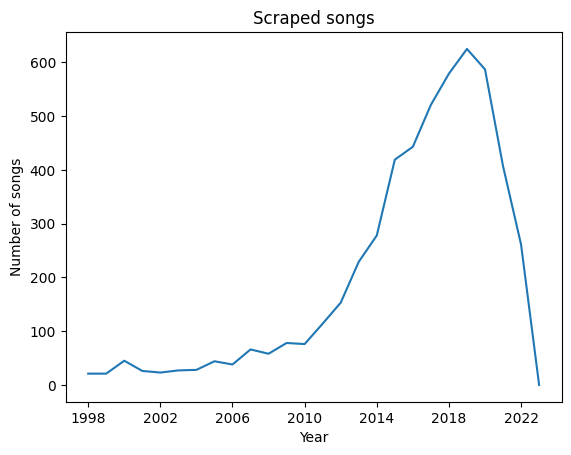

In [72]:
print(results_occurences)

ticks = [str(num) for num in range(1998, 2023, 4)]

plt.plot(results_occurences.loc['number_of_songs'])
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Number of songs")  # add Y-axis label
plt.title("Scraped songs")  # add title
plt.xticks(ticks)

plt.savefig('../../data/number_of_songs'+ '.png')

plt.show()

In [48]:
results_sentiment

{'1998': [-0.17979792687628005,
  -0.26309873163700104,
  -0.4096386040511884,
  -0.5471476757008097,
  -0.27045616172254083,
  -0.5515440684192034,
  -0.3419092963139216,
  -0.795497182824395,
  -0.357010548820301,
  -0.28186825414498645,
  -0.5452099754696801,
  0.45948957261585055,
  -0.3604675456881523,
  -0.31333801664155103,
  -0.2876472556963563,
  -0.510880587277589,
  -0.6970145872661045,
  -0.32970236028943745,
  -0.4917970269918442,
  -0.11717172622680665,
  -0.3951802589954474],
 '1999': [-0.29544631326407716,
  -0.2812033794647039,
  -0.5343011915683746,
  -0.326773039996624,
  -0.28552423512682,
  -0.43432436971103444,
  -0.5877403739620658,
  -0.2916738986968994,
  0.023335704436668984,
  -0.44877961874008176,
  -0.5034393354466087,
  -0.5894343544136394,
  -0.33490859358399,
  -0.25741768221963535,
  -0.5456355776426927,
  -0.5115116008541041,
  -0.38843342661857605,
  -0.20695268213748932,
  -0.3411898696145346,
  -0.29345674387046267,
  -0.6060496419668198],
 '2000': 

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
q_25,-0.510881,-0.511512,-0.485057,-0.455357,-0.440849,-0.482234,-0.533947,-0.553878,-0.473962,-0.562037,...,-0.506983,-0.527264,-0.507008,-0.522196,-0.521519,-0.508263,-0.524306,-0.549686,-0.548998,-0.537921
median,-0.357011,-0.34119,-0.37406,-0.364325,-0.356176,-0.305153,-0.435641,-0.376038,-0.364538,-0.436755,...,-0.400405,-0.406743,-0.395265,-0.406928,-0.401853,-0.39171,-0.397763,-0.411039,-0.428665,-0.423131
q_75,-0.281868,-0.291674,-0.276908,-0.259618,-0.18718,-0.238919,-0.32217,-0.298263,-0.241795,-0.302995,...,-0.299576,-0.270087,-0.272741,-0.271708,-0.266226,-0.255919,-0.258006,-0.286917,-0.28334,-0.280201


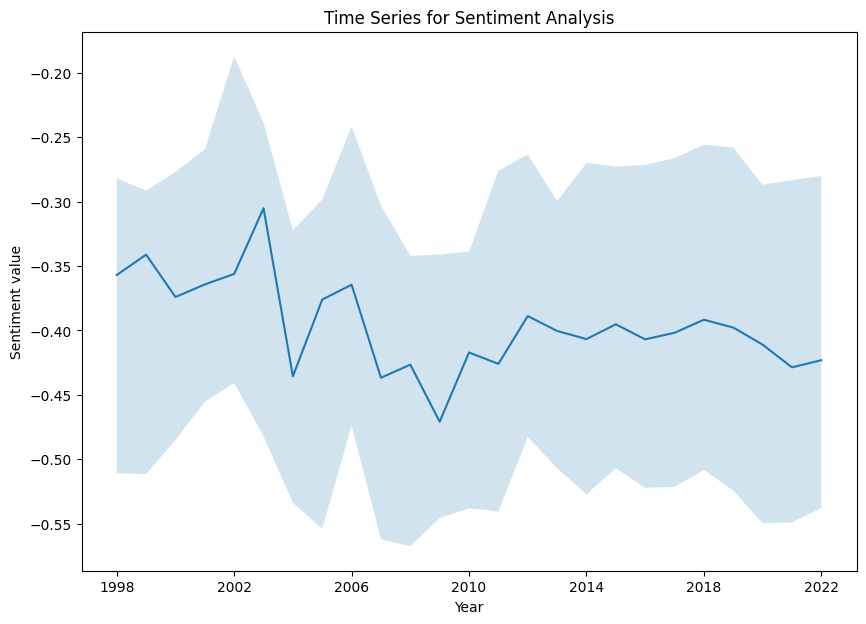

In [108]:

columns = [str(i) for i in range(1998, 2023)]
ticks = [num for num in range(1998, 2023, 4)]

index = ["q_25", "median", "q_75"]
quantiles_sentiment = pd.DataFrame(
                       index=index,
                       columns=columns)

for year, values in results_sentiment.items():
    if(len(values) > 0):
        # median
        median = np.median(values)
        # 0.25 quantile
        q_25 = np.quantile(values, 0.25)
        # 0.75 quantile
        q_75 = np.quantile(values, 0.75)

        quantiles_sentiment.at['median', year] = median
        quantiles_sentiment.at['q_25', year] = q_25
        quantiles_sentiment.at['q_75', year] = q_75


display(quantiles_sentiment)

median = np.array(quantiles_sentiment.loc['median'], dtype=float)
# Creating histogram
fig, ax = plt.subplots(1,1,figsize =(10, 7))
ax.plot(list(range(1998, 2023)), median)
ax.fill_between(list(range(1998, 2023)),
                np.array(quantiles_sentiment.loc['q_25'], dtype=float),
                np.array(quantiles_sentiment.loc['q_75'], dtype=float), alpha=0.2)



plt.xlabel("Year")  # add X-axis label
plt.ylabel("Sentiment value")  # add Y-axis label
plt.title("Time Series for Sentiment Analysis")  # add title
plt.xticks(ticks)

plt.savefig('../../data/time_series_sentiment'+ '.png')
plt.show()


,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
q_25,-0.615805,-0.197654,-0.282305,-0.507835,-0.569823,-0.27906,-0.557244,-0.53206,-0.571071,-0.453043,...,-0.465716,-0.555469,-0.565443,-0.58425,-0.573391,-0.555312,-0.627855,-0.650607,-0.641374,-0.631712
median,-0.410458,0.024505,-0.011506,-0.272658,-0.377792,-0.142296,-0.378978,-0.186994,-0.280839,-0.217728,...,-0.291852,-0.24129,-0.301844,-0.290775,-0.31814,-0.349315,-0.392941,-0.438803,-0.428398,-0.442839
q_75,0.045847,0.120011,0.172687,0.084483,-0.093329,0.033995,-0.272569,-0.005564,0.021942,-0.025417,...,-0.037477,-0.011873,-0.038378,-0.023003,-0.044815,-0.0838,-0.148424,-0.22059,-0.187085,-0.192073


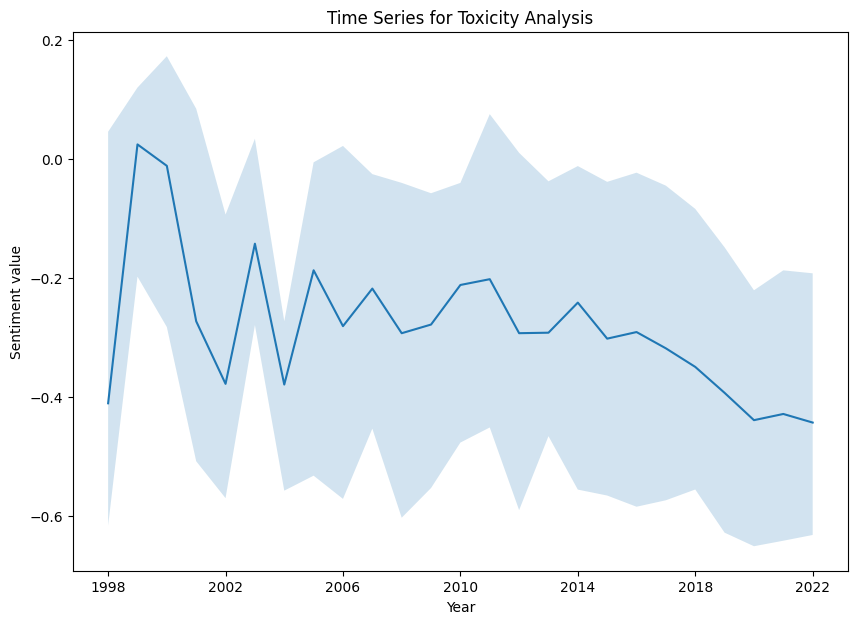

In [110]:
columns = [str(i) for i in range(1998, 2023)]
ticks = [num for num in range(1998, 2023, 4)]

index = ["q_25", "median", "q_75"]
quantiles_sentiment = pd.DataFrame(
                       index=index,
                       columns=columns)

for year, values in results_toxicity.items():
    if(len(values) > 0):
        # median
        median = np.median(values)
        # 0.25 quantile
        q_25 = np.quantile(values, 0.25)
        # 0.75 quantile
        q_75 = np.quantile(values, 0.75)

        quantiles_sentiment.at['median', year] = median
        quantiles_sentiment.at['q_25', year] = q_25
        quantiles_sentiment.at['q_75', year] = q_75


display(quantiles_sentiment)

median = np.array(quantiles_sentiment.loc['median'], dtype=float)
# Creating histogram
fig, ax = plt.subplots(1,1,figsize =(10, 7))
ax.plot(list(range(1998, 2023)), median)
ax.fill_between(list(range(1998, 2023)),
                np.array(quantiles_sentiment.loc['q_25'], dtype=float),
                np.array(quantiles_sentiment.loc['q_75'], dtype=float), alpha=0.2)



plt.xlabel("Year")  # add X-axis label
plt.ylabel("Sentiment value")  # add Y-axis label
plt.title("Time Series for Toxicity Analysis")  # add title
plt.xticks(ticks)

plt.savefig('../../data/time_series_toxicity'+ '.png')
plt.show()

In [99]:
# TODO: Time series for occurrences
# TODO: Time series for zero shot

25